# Applying linear regression model to Healthcare for all case study

## Get our tookit - import modules / libraries 

In [1]:
# pandas, numpy, matplotlib, %matplotlib inline, seaborn 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 


In [2]:
#import the model

from sklearn import linear_model

#import evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score 

This is an ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

Linear Regression Pros and Cons 

+ Pros: Easy to interpret results, computationally inexpensive
+ Cons: Poorly models nonlinear data
+ Works with: Numeric values, nominal values, normally distributed data 

## Get the data, review the shape and clarify headings. 

If any data clean steps are needed, do that now

In [3]:
data=pd.read_csv('Healthcare/end_thurs_cleaned.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Healthcare/end_thurs_cleaned.csv'

In [23]:
data.head(30)

,id,state,gender,median_household_val,ic1,ic4,hvp1,ic5,pobc1,pobc2,median_household_income,ic3,avggift,tcode,dob,domain,target_d
0,44060,FL,Male,1158.437751,392,520.0,7,21975.0,6,16,430.0,466,28.000000,1,1901,C2,100.0
1,96093,IL,Male,537.000000,365,473.0,0,19387.0,1,89,415.0,410,5.666667,0,0,T2,7.0
2,43333,FL,Female,725.000000,301,436.0,3,18837.0,11,17,340.0,361,4.111111,0,2501,C2,5.0
3,21885,NC,Male,1158.437751,401,413.0,7,14014.0,1,74,407.0,399,27.277778,0,2208,T2,38.0
4,190108,FL,Female,995.000000,252,348.0,0,17991.0,5,6,280.0,316,6.000000,28,0,C2,5.0
5,100640,IL,Male,764.000000,457,501.0,1,16022.0,2,75,477.0,480,25.571429,1,6104,S2,30.0
6,18581,NC,Female,775.000000,318,419.0,5,13491.0,0,73,364.0,380,4.625000,0,4407,R2,12.0
7,119038,TX,Male,890.000000,519,560.0,0,17872.0,2,46,525.0,551,6.175000,1002,0,C1,7.0
8,173223,CA,Female,1158.437751,184,250.0,0,8708.0,2,63,206.0,235,8.818182,0,1801,T2,10.0
9,141720,NV,Female,1569.000000,673,781.0,22,25775.0,3,44,672.0,785,13.000000,28,5401,T1,5.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3993 entries, 0 to 3992
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       3993 non-null   int64  
 1   state                    3993 non-null   object 
 2   gender                   3993 non-null   object 
 3   median_household_val     3993 non-null   float64
 4   ic1                      3993 non-null   int64  
 5   ic4                      3993 non-null   float64
 6   hvp1                     3993 non-null   int64  
 7   ic5                      3993 non-null   float64
 8   pobc1                    3993 non-null   int64  
 9   pobc2                    3993 non-null   int64  
 10  median_household_income  3993 non-null   float64
 11  ic3                      3993 non-null   int64  
 12  avggift                  3993 non-null   float64
 13  tcode                    3993 non-null   int64  
 14  dob                     

In [8]:
data.shape

(3993, 17)

### Isolate the numeric data 

We can only work with numeric data without pre-processing (see later section), so first we must separate our data into numeric and non numeric. 

In [6]:
data_num=data.select_dtypes(include=np.number)

In [22]:
data_num.head(30)

,id,median_household_val,ic1,ic4,hvp1,ic5,pobc1,pobc2,median_household_income,ic3,avggift,tcode,dob,target_d
0,44060,1158.437751,392,520.0,7,21975.0,6,16,430.0,466,28.000000,1,1901,100.0
1,96093,537.000000,365,473.0,0,19387.0,1,89,415.0,410,5.666667,0,0,7.0
2,43333,725.000000,301,436.0,3,18837.0,11,17,340.0,361,4.111111,0,2501,5.0
3,21885,1158.437751,401,413.0,7,14014.0,1,74,407.0,399,27.277778,0,2208,38.0
4,190108,995.000000,252,348.0,0,17991.0,5,6,280.0,316,6.000000,28,0,5.0
5,100640,764.000000,457,501.0,1,16022.0,2,75,477.0,480,25.571429,1,6104,30.0
6,18581,775.000000,318,419.0,5,13491.0,0,73,364.0,380,4.625000,0,4407,12.0
7,119038,890.000000,519,560.0,0,17872.0,2,46,525.0,551,6.175000,1002,0,7.0
8,173223,1158.437751,184,250.0,0,8708.0,2,63,206.0,235,8.818182,0,1801,10.0
9,141720,1569.000000,673,781.0,22,25775.0,3,44,672.0,785,13.000000,28,5401,5.0


In [9]:
data_num.shape

(3993, 14)

## clarify the objective including determining the label (column) we wish to predict

once the label has been identified, set that as y and remove that field from the other data (X)

Our objective:

Given a predictor variable X and a response variable y, we fit a straight line to this data that minimizes the distance—most commonly the average squared distance—between the sample points and the fitted line. We can now use the intercept and slope learned from this data to predict the outcome variable of new data.


In [10]:
y=data_num['target_d']

In [13]:
X=data_num.drop(['target_d'],axis=1)

In [15]:
lm=linear_model.LinearRegression()
# line of best fit 

### If we were to simply apply the linear regression now : 

In [ ]:
# define the model 

#? donation amount - can be predicted, given all the other numerical information we have 

# Ho Ha - we can predict how much someone will give depending on where they live - (excl gender)

In [16]:
# fit the model to our data (only numerical data)
line=lm.fit(X,y)

# calculate a score - R2 score 
lm.score(X,y)

0.2451016184485083

In [17]:
#get predictions

predictions  = lm.predict(X)
predictions

array([26.01107541, 11.69960974, 11.42975158, ..., 15.72846135,
       17.23815538, 17.54930339])

### Measure the accuracy of linear regression 

One of the primary measures of accuracy we can use in linear regression is r2

r-squared tells us goodness of fit, ie how well the regression model fits the observed data. For example, an r-squared of 60% reveals that 60% of the data fit the regression model. Generally, a higher r-squared indicates a better fit for the model. We want a single score to tell us how well the regression predictions approximate the real data points. An R2 of 1 indicates that the regression predictions perfectly fit the data. 

In [18]:
r2_score(y, predictions)

0.2451016184485083

In [19]:
mean_squared_error(y, predictions)

121.78536264658757

The intercept (often labeled the constant) is the expected mean value of Y when all X=0. Start with a regression equation with one predictor, X. If X sometimes equals 0, the intercept is simply the expected mean value of Y at that value. 

If X never equals 0, then the intercept has no intrinsic meaning.

In [20]:
lm.intercept_

6.618513707211957

In linear regression, coefficients are the values that multiply the predictor values. 

The sign of each coefficient indicates the direction of the relationship between a predictor variable and the response variable.

A positive sign indicates that as the predictor variable increases, the response variable also increases.
A negative sign indicates that as the predictor variable increases, the response variable decreases.

The coefficient value represents the mean change in the response given a one unit change in the predictor. For example, if a coefficient is +3, the mean response value increases by 3 for every one unit change in the predictor.

In [21]:
lm.coef_

array([ 6.33569118e-06, -3.81271632e-04, -7.45221899e-03,  1.89632971e-03,
        5.70037966e-03,  6.75957467e-05, -2.11513889e-02, -1.40665425e-02,
        3.06036428e-03,  4.42434475e-03,  5.96237947e-01, -1.27279727e-04,
        1.28714505e-04])

# Pre processing

In Pre Processing the data analyst makes best efforts to give the ML model a 'fighting chance':
* cleaning the data, dealing with nulls, outliers 
* removing similar columns which present a multicollinearity risk
* eliminating heavily skewed data points through re-scaling 
* transforming all non numeric variables into numbers 

We will also need an important step to ensure relevance :
* To determine whether our machine learning algorithm not only performs well on the training set but also generalizes well to new data, we will  randomly divide the dataset into a separate training and test set. 
* We use the training set to train and optimize our machine learning model, while we keep the test set until the very end to evaluate the final model.

### split the data into numeric and categorical features (columns) for pre processing - except the label 

In [38]:
#define the y predictor variable 
y=data['target_d']

In [39]:
#drop y from x 
data=data.drop(['target_d'],axis=1)

In [40]:
X_num = data.select_dtypes(include = np.number)

In [41]:
X_cat = data.select_dtypes(include = object)

## Check for multicollinearity 

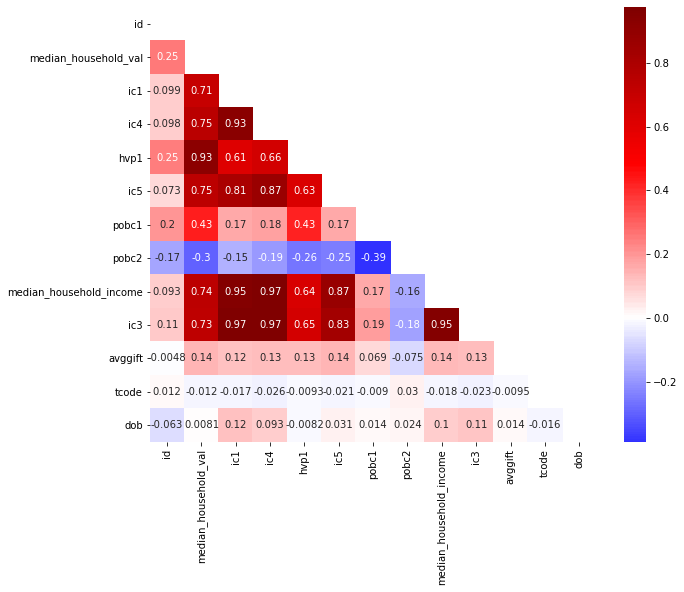

In [42]:
correlations_matrix=data.corr()
mask=np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)]=True
fig,ax= plt.subplots(figsize=(10,8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True, cmap='seismic', center=0)
plt.show()

### if any columns are highly correlated, we should drop them now 

In [44]:
X_num=X_num.drop(['ic3','ic4','hvp1','id'],axis=1)

In [45]:
X_num.columns

Index(['median_household_val', 'ic1', 'ic5', 'pobc1', 'pobc2',
       'median_household_income', 'avggift', 'tcode', 'dob'],
      dtype='object')

## Check and transform for normality, skewness, outliers using histograms and distribution plots - numerical data

In [ ]:
#more EDA - box plots and histograms 

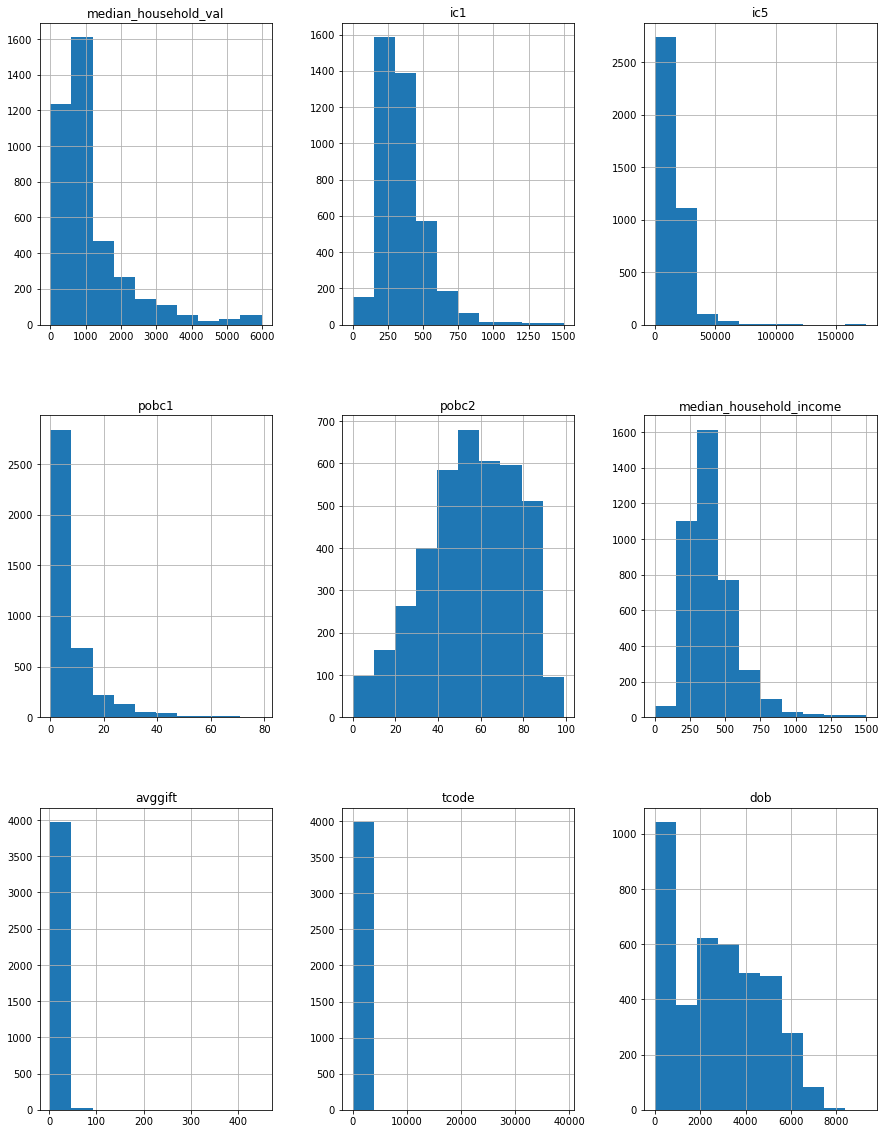

In [46]:
X_num.hist(figsize = (15,20));

<AxesSubplot:xlabel='ic5'>

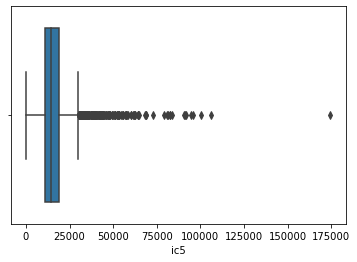

In [36]:
sns.boxplot(x=X_num['ic5'])

<AxesSubplot:xlabel='avggift'>

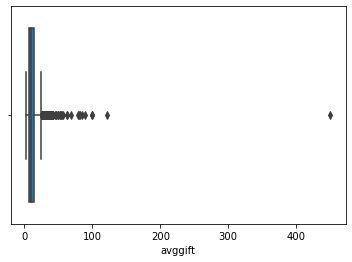

In [49]:
sns.boxplot(x=X_num['avggift'])

<AxesSubplot:xlabel='tcode'>

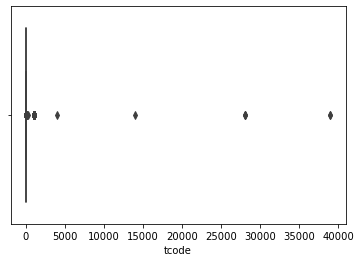

In [47]:
sns.boxplot(x=X_num['tcode'])

### are there any other numerical columns we want to drop now because they are not correlated atall to the target variable?

In [ ]:
X_num=X_num.drop(['tcode'],axis=1)

### if we identify outliers, they can be removed by calculating the IQR (inter quartile range)

In [54]:
iqr=np.percentile(X_num['ic5'],75)-np.percentile(X_num['ic5'],25)
upper_limit=np.percentile(X_num['ic5'],75)+(1.5*iqr)
lower_limit=np.percentile(X_num['ic5'],25)-(1.5*iqr)
excl_outliers=X_num[(X_num['ic5']>lower_limit)&(X_num['ic5']<upper_limit)]


<AxesSubplot:xlabel='ic5'>

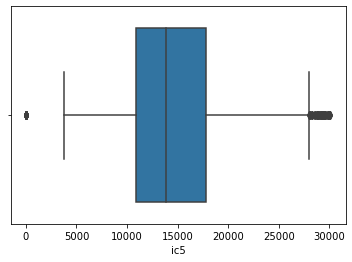

In [55]:
sns.boxplot(x=excl_outliers['ic5'])

<AxesSubplot:>

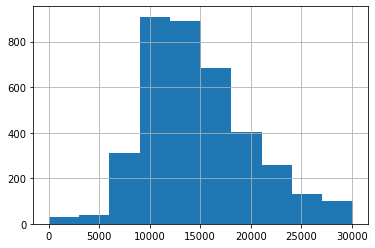

In [59]:
excl_outliers['ic5'].hist()

<AxesSubplot:>

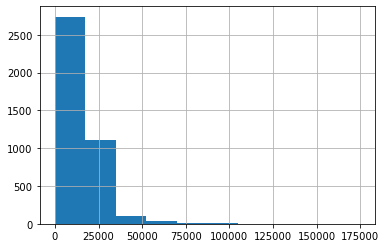

In [63]:
X_num['ic5'].hist()

In [56]:
excl_outliers.shape

(3753, 8)

In [57]:
excl_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3753 entries, 0 to 3992
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   median_household_val     3753 non-null   float64
 1   ic1                      3753 non-null   int64  
 2   ic5                      3753 non-null   float64
 3   pobc1                    3753 non-null   int64  
 4   pobc2                    3753 non-null   int64  
 5   median_household_income  3753 non-null   float64
 6   avggift                  3753 non-null   float64
 7   dob                      3753 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 263.9 KB


In [58]:
excl_outliers.describe()

,median_household_val,ic1,ic5,pobc1,pobc2,median_household_income,avggift,dob
count,3753.000000,3753.000000,3753.000000,3753.000000,3753.000000,3753.000000,3753.000000,3753.000000
mean,1001.280709,328.968558,14734.825739,6.554490,56.343991,373.236078,11.528393,2707.976552
std,744.054626,131.003945,5245.623921,9.479513,21.560589,132.963771,9.893796,2061.809993
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.260870,0.000000
25%,533.000000,232.000000,10917.000000,1.000000,42.000000,279.000000,7.100000,601.000000
50%,754.000000,310.000000,13859.000000,3.000000,58.000000,357.000000,10.000000,2701.000000
75%,1180.000000,407.000000,17763.000000,8.000000,74.000000,455.000000,14.000000,4401.000000
max,5283.000000,906.000000,30096.000000,79.000000,99.000000,924.000000,450.000000,9310.000000


### After making any changes to the data - replot to see the impact 

## Re-scaling transformation methods - for one or more skewed columns or a column with distant, legitimate outliers

### Log transformation

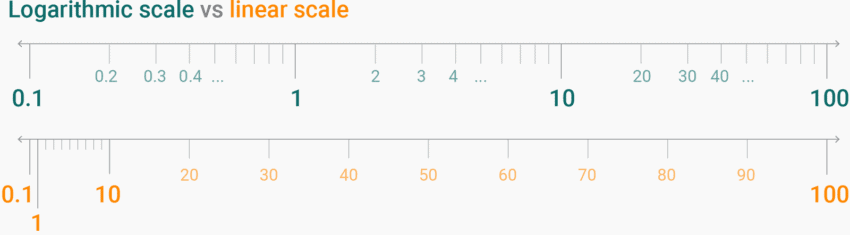

In [5]:
from IPython.display import Image
Image("logvlinear.png")

##### warning 

Warning, some values might become -inf with this method, so we will have to filter those values out and then replace them with sensible values. If there are too many such values in a column, this method cannot be used. 

In [75]:
def log_transform_clean(x):
    x=np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN

X_num['ic5_log']=list(map(log_transform_clean,X_num['ic5']))

<ipython-input-75-7a3dababf879>:2: RuntimeWarning: divide by zero encountered in log
  x=np.log(x)


<AxesSubplot:>

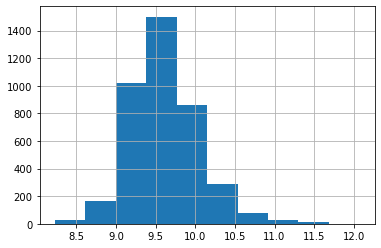

In [78]:
X_num['ic5_log'].hist()

In [83]:
X_num['ic5_log']=X_num['ic5_log'].fillna(np.mean(X_num['ic5_log']))


In [84]:
X_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3993 entries, 0 to 3992
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   median_household_val     3993 non-null   float64
 1   ic1                      3993 non-null   int64  
 2   ic5                      3993 non-null   float64
 3   pobc1                    3993 non-null   int64  
 4   pobc2                    3993 non-null   int64  
 5   median_household_income  3993 non-null   float64
 6   avggift                  3993 non-null   float64
 7   dob                      3993 non-null   int64  
 8   ic5_log                  3993 non-null   float64
dtypes: float64(5), int64(4)
memory usage: 280.9 KB


### After making any changes to the data - replot to see the impact 

### if satisfied with a proposed change, replace the column 

In [85]:
X_num=X_num.drop(['ic5'], axis=1)

### Box cox transformation for making data normal

Return a dataset transformed by a Box-Cox power transformation.

##### warning this method requires the data be positive. We can filter out negative values and replace with the mean

Box cox trans requires SCIPY - go to terminal and on your env install scipy 

using 

> conda install -c anaconda scipy

then 

> from scipy import stats

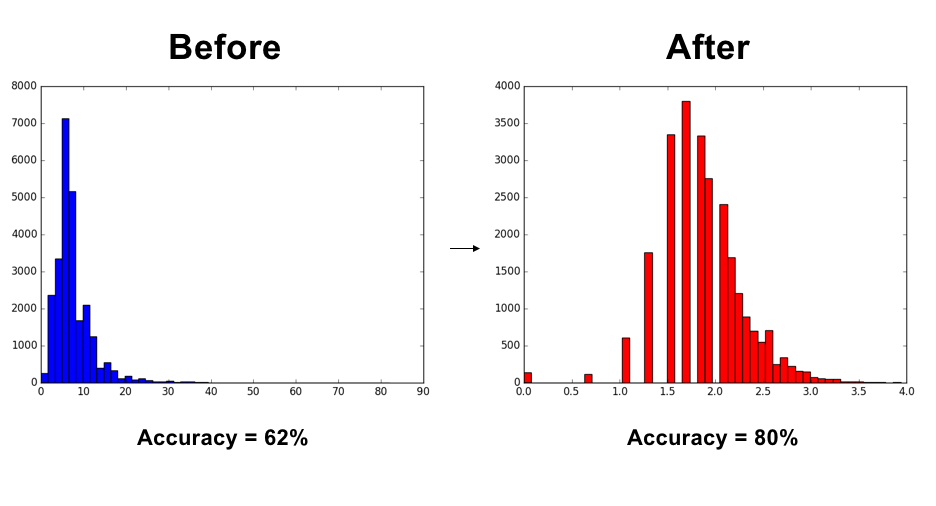

In [6]:
Image("before_and_after.png")

### After making any changes to the data - replot to see the impact 

### if satisfied with a proposed change, replace the column 

## sklearn rescaling methods - for many columns at once

### numerical rescaling - common options 

+ Normalizer 

+ StandardScaler

+ MinMaxScaler

[compare the effects of scalers](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html)

[when to use which](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02)

- Use MinMaxScaler as your default
- Use RobustScaler if you have outliers and can handle a larger range
- Use StandardScaler if you need normalized features
- Use Normalizer sparingly - it normalizes rows, not columns


##### check the shape of each normalised numerical X before going further. 

In [ ]:
# option 1 standardising all numeric features / rescaling using Robust Scaler

In [94]:
from sklearn.preprocessing import RobustScaler
robust=RobustScaler().fit(X_num)
x_robust=robust.transform(X_num)

In [95]:
scaled=pd.DataFrame(x_robust)

In [ ]:
#option 2 standardising all numeric features / rescaling using Standard Scaler

In [ ]:
#option 3 standardising all numeric features / rescaling using MinMax scaler


In [86]:
from sklearn.preprocessing import MinMaxScaler 

transform=MinMaxScaler().fit(X_num)
x_mmscaled=transform.transform(X_num)

In [88]:
x_mmscaled.shape

(3993, 8)

In [90]:
scaled=pd.DataFrame(x_mmscaled)

In [87]:
X_num.shape

(3993, 8)

### at this stage you could check the histograms to see the best scaling approach

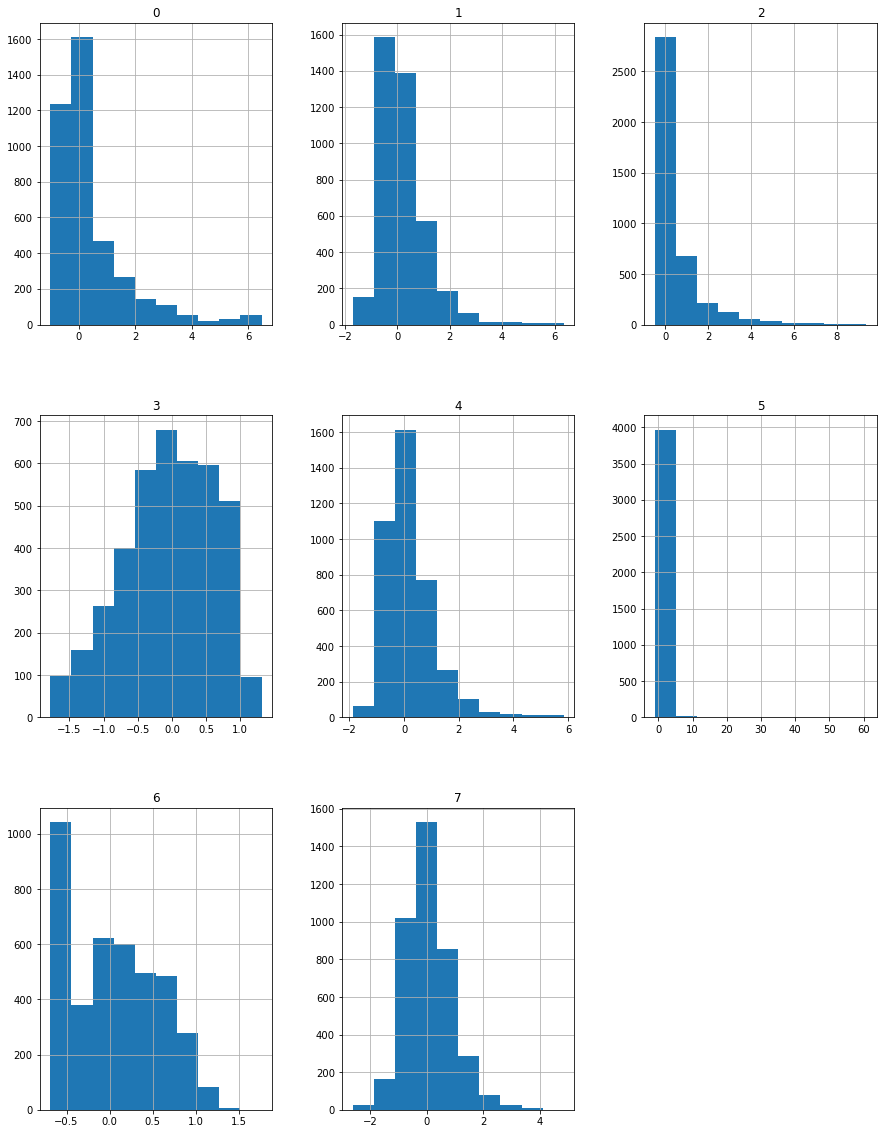

In [96]:
scaled.hist(figsize = (15,20));

### select which numerical transformation process you will use - this replaces X_num

In [97]:
X_num=x_robust

## pre processing categorical columns 

In [98]:
#review categorical data 
X_cat

,state,gender,domain
0,FL,Male,C2
1,IL,Male,T2
2,FL,Female,C2
3,NC,Male,T2
4,FL,Female,C2
...,...,...,...
3988,MI,Female,0
3989,FL,Male,T2
3990,CA,Female,U1
3991,CA,Male,S1


In [100]:
X_cat['gender'].value_counts()

Female     2276
Male       1648
Unknown      69
Name: gender, dtype: int64

### Are there any categorical features we want to drop ? 

In [ ]:
# no keeping all columns

### Turning categories into numbers 

#### One hot encoder 

[Explanation of OHE](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f)

In [101]:
#option 1 using OHE 
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_cat)
encoded = encoder.transform(X_cat).toarray()
encoded


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### Label encoding 

[explanation of LE](https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/)

In [103]:
#option 1 using LE- orders by value counts
#LE is for one column at a time 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(X_cat['gender'])
le.transform(X_cat['gender']) 


array([1, 1, 0, ..., 0, 1, 1])

#### Get Dummies 

[explanation of getting dummies](https://www.geeksforgeeks.org/python-pandas-get_dummies-method/)

In [109]:
X_cat_new = pd.get_dummies(X_cat, columns=['gender','state','domain'])
#drop_first=True

In [110]:
X_cat_new

,gender_Female,gender_Male,gender_Unknown,state_AA,state_AE,state_AK,state_AL,state_AP,state_AR,state_AZ,...,domain_S1,domain_S2,domain_S3,domain_T1,domain_T2,domain_T3,domain_U1,domain_U2,domain_U3,domain_U4
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3988,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3989,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3990,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3991,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


### select which categorical transformation process you will use - this replaces X_cat

In [111]:
X_cat=encoded

In [112]:
y.shape

(3993,)

In [113]:
X_cat.shape

(3993, 69)

In [114]:
X_num.shape

(3993, 8)

# bring categorical and numerical X back together 


**check the shape of the arrays to ensure no rows have been lost**

In [115]:
X=np.concatenate((X_num,X_cat),axis=1)

**check the shape of the y array, X and y should have an equal no of rows**


In [116]:
X.shape

(3993, 77)

In [117]:
y.shape

(3993,)

# Split the data into train and test, randomly, as a %, using 

> from sklearn.model_selection import train_test_split


In [119]:
from sklearn.model_selection import train_test_split

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=10)

# Apply the model again - to pre processed data

## confirm our objective :
+ what are we seeking to predict 
+ how will we measure our success? 

In [137]:
# apply the model 

lm=linear_model.LinearRegression()
model=lm.fit(X_train,y_train) # teach the model to find the line of best fit 
predictions=lm.predict(X_test) # run predictions based on X_test (we cannot see y_test)
r2_score(y_test, predictions)#compare y_test to predictions 

-3.153722657277449e+20

In [138]:
predictions

array([19.62051796, 16.41996628, 16.52688002, ...,  7.74699776,
       18.18840844, 24.4590824 ])

In [132]:
X_test.shape

(1198, 77)

In [128]:
y_test.shape

(1598,)

## Additional Evaluation Metrics for LR

https://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e

MSE (mean squared error) represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals.


A residual is the vertical distance between a data point and the regression line. Each data point has one residual. They are positive if they are above the regression line and negative if they are below the regression line. ... In other words, the residual is the error that isn't explained by the regression line

In [139]:
mse=mean_squared_error(y_test, predictions)

In [140]:
mse

4.6519994993950815e+22

RMSE (Root Mean Squared Error) is the square root of Mean Squared error. It measures the standard deviation of residuals.

In [141]:
rmse=np.sqrt(mse)

In [142]:
rmse

215684943827.6831

Lets calculate R2 again and see if it has improved after pre processing 

The adjusted R-squared is a modified version of R-squared that adjusts for the number of predictors in a regression model. It is calculated as:

Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-p-1)]

where:

* R2: The R2 of the model
* n: The number of observations
* p: The number of predictor variables

# How might we improve our model? Why is our LR model so inaccurate? 

In [ ]:
# rescaling numerical fields ? 

# not sure - ill come up with some ideas 
